In [55]:
#CIS600 - Evolutionary Machine Learning
# Homework 2
# Instructor = Professor C.K. Mohan
# T.A. = Subodh Kalia
# Author = Suket Singh SUID: 923277656

In [56]:
#Import statements for packages

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing import sequence
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras as ks
import pandas as pd
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
matplotlib.style.use('ggplot')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [57]:
# Fetch Sinewave Data From File
dataset_sinewave = pd.read_csv('Sinewave.csv', header=0)
generate_data = dataset_sinewave.values
generate_data = generate_data.astype('float32')

In [58]:
# Split the data into train and test parts
size_of_train = int(len(generate_data) * 0.8)
size_of_test = len(generate_data) - size_of_train
traindata, testdata = generate_data[0:size_of_train,:], generate_data[size_of_train:len(generate_data),:]
print(len(traindata), len(testdata))

# Convert the series data into a dataset matrix of X and Y values
def generate_dataset(data, feature):
    data_first, data_second = [], []
    for i in range(len(data) - feature):
        x = data[i:(i + feature), 0]
        data_first.append(x)
        data_second.append(data[i + feature, 0])
    return np.array(data_first), np.array(data_second)

features = 1

x_train, y_train = generate_dataset(traindata, features)
x_test, y_test = generate_dataset(testdata, features)

# Do not use this standard function! Wrecks the series data
#x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, size_of_test=0.20)

# Reshape input to [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Print shape values to verify
print(x_train.shape, x_test.shape)
#print("x_test = ", x_test, "\n\ny_test = ", y_test)
#print(y_test)

4000 1001
(3999, 1, 1) (1000, 1, 1)


In [59]:
#sgd = ks.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# LSTM Model with 1 hidden layer
model = Sequential()
model.add(LSTM(64, input_shape=(1,features)))
# #model.add(Dropout(0.1))
# model.add(LSTM(32))
# #model.add(Dropout(0.2))
# model.add(LSTM(16, return_sequences=True))
# #model.add(Dropout(0.2))
# model.add(LSTM(5))
model.add(Dense(1))
# model.add(Activation('linear')) 

model.compile(loss = 'mean_squared_error', optimizer='sgd')

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
# Run the model on training dataset.
result = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
3999/3999 [==============================] - 1s 149us/step - loss: 0.3750
Epoch 2/50
3999/3999 [==============================] - 0s 31us/step - loss: 0.2407
Epoch 3/50
3999/3999 [==============================] - 0s 34us/step - loss: 0.1341
Epoch 4/50
3999/3999 [==============================] - 0s 34us/step - loss: 0.0639
Epoch 5/50
3999/3999 [==============================] - 0s 33us/step - loss: 0.0269
Epoch 6/50
3999/3999 [==============================] - 0s 37us/step - loss: 0.0109
Epoch 7/50
3999/3999 [==============================] - 0s 36us/step - loss: 0.0050
Epoch 8/50
3999/3999 [==============================] - 0s 35us/step - loss: 0.0030
Epoch 9/50
3999/3999 [==============================] - 0s 37us/step - loss: 0.0023
Epoch 10/50
3999/3999 [==============================] - 0s 37us/step - loss: 0.0021
Epoch 11/50
3999/3999 [==============================] - 0s 39us/step - loss: 0.0021
Epoch 12/50
3999/3999 [==============================] - 0s 39us/step - l

Test Data MSE:  0.04510768009928665
Train Data MSE:  0.045109816977156166


<function matplotlib.pyplot.show(*args, **kw)>

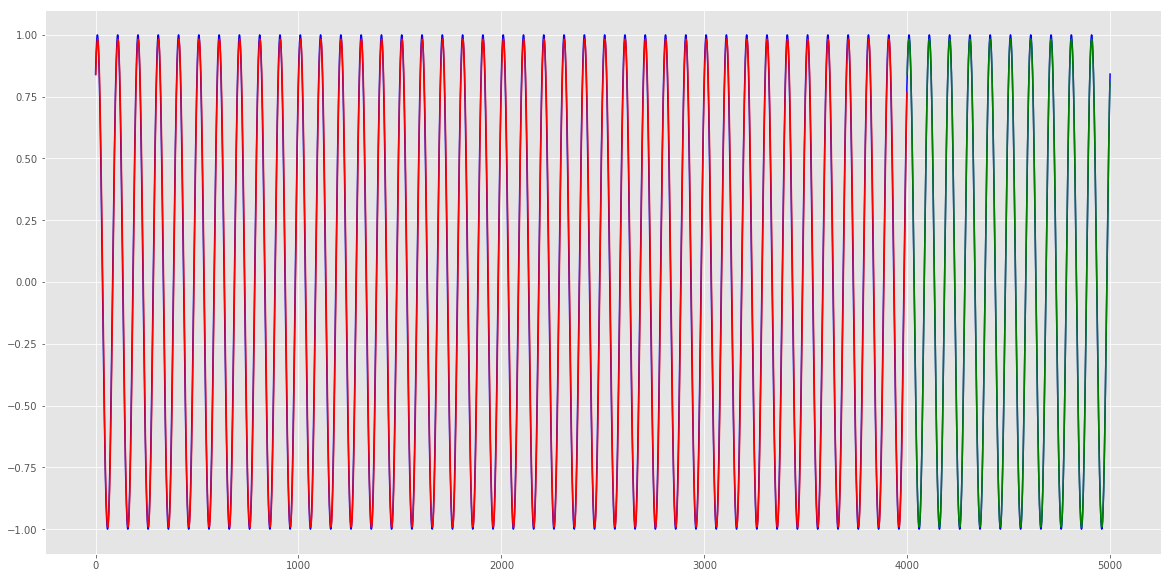

In [61]:
# The following code predicts values based on the trained model.
p_train = model.predict(x_train)
p_test = model.predict(x_test)

print('Test Data MSE: ', math.sqrt(mean_squared_error(y_test, p_test)))
print('Train Data MSE: ', math.sqrt(mean_squared_error(y_train, p_train)))


# he trained predictions are coverted for plotting.
train_Plot = np.empty_like(generate_data)
train_Plot[:, :] = np.nan
train_Plot[features:len(p_train)+features, :] = p_train

# CThe test predictions are converted for plotting.
test_Plot = np.empty_like(generate_data)
test_Plot[:, :] = np.nan
test_Plot[len(p_train)+(features):len(generate_data)-1, :] = p_test

# Here we plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(generate_data, color='blue')
plt.plot(train_Plot, color='red')
plt.plot(test_Plot, color='green')
plt.show


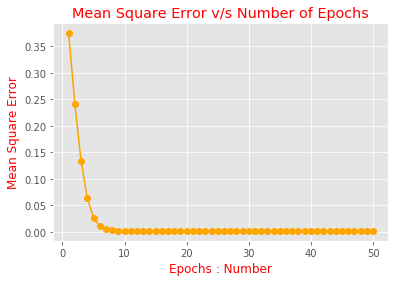

In [62]:
#Here we plot the MSE with the epochs. 
y_axis = result.history['loss']
x_axis = list(range(1,51))
plt.plot(x_axis, y_axis, marker='o', color='orange')
plt.xlabel("Epochs : Number", color="r")
plt.ylabel("Mean Square Error", color = "r")
plt.title("Mean Square Error v/s Number of Epochs", color="r")
plt.show()